In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
%load_ext pycodestyle_magic

In [4]:
%flake8_on

In [5]:
df = pd.read_csv('md_df.csv')

In [6]:
from sklearn import preprocessing

x = df.values
rscaler = preprocessing.RobustScaler()
x_scale = rscaler.fit_transform(x)


In [18]:
n_inputs = x_scale.shape[1]

inputs = keras.Input(shape=(n_inputs,))
hidden1e = layers.Dense(int(n_inputs/2), activation='relu')(inputs)
hidden2e = layers.Dense(int(n_inputs/4), activation='relu')(hidden1e)
hidden3e = layers.Dense(int(n_inputs/8), activation='relu')(hidden2e)
code = layers.Dense(3, activation='relu')(hidden3e)
hidden3d = layers.Dense(int(n_inputs/8), activation='relu')(code)
hidden2d = layers.Dense(int(n_inputs/4), activation='relu')(hidden3d)
hidden1d = layers.Dense(int(n_inputs/2), activation='relu')(hidden2d)
outputs = layers.Dense(n_inputs, activation='relu')(hidden1d)

autoencoder = keras.Model(inputs=inputs, outputs=outputs, name="autoencoder")

autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(x_scale, x_scale, epochs=100, batch_size=4, verbose=0)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 152)]             0         
                                                                 
 dense_20 (Dense)            (None, 76)                11628     
                                                                 
 dense_21 (Dense)            (None, 38)                2926      
                                                                 
 dense_22 (Dense)            (None, 19)                741       
                                                                 
 dense_23 (Dense)            (None, 3)                 60        
                                                                 
 dense_24 (Dense)            (None, 19)                76        
                                                                 
 dense_25 (Dense)            (None, 38)                

11:44: E251 unexpected spaces around keyword / parameter equals
11:46: E251 unexpected spaces around keyword / parameter equals
17:80: E501 line too long (80 > 79 characters)


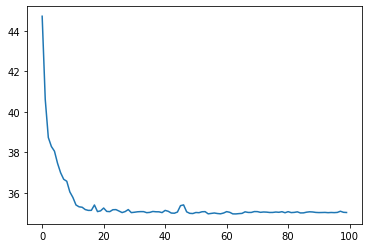

In [8]:
plt.plot(history.history['loss'], label='train')

In [9]:
encoder = keras.Model(inputs=inputs, outputs=code)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 152)]             0         
                                                                 
 dense (Dense)               (None, 76)                11628     
                                                                 
 dense_1 (Dense)             (None, 38)                2926      
                                                                 
 dense_2 (Dense)             (None, 19)                741       
                                                                 
 dense_3 (Dense)             (None, 3)                 60        
                                                                 
Total params: 15,355
Trainable params: 15,355
Non-trainable params: 0
_________________________________________________________________


1:29: E251 unexpected spaces around keyword / parameter equals
1:31: E251 unexpected spaces around keyword / parameter equals
1:47: E251 unexpected spaces around keyword / parameter equals
1:49: E251 unexpected spaces around keyword / parameter equals


In [10]:
x_proj3d = encoder.predict(x_scale)

88/88 [==============================] - 0s 828us/step


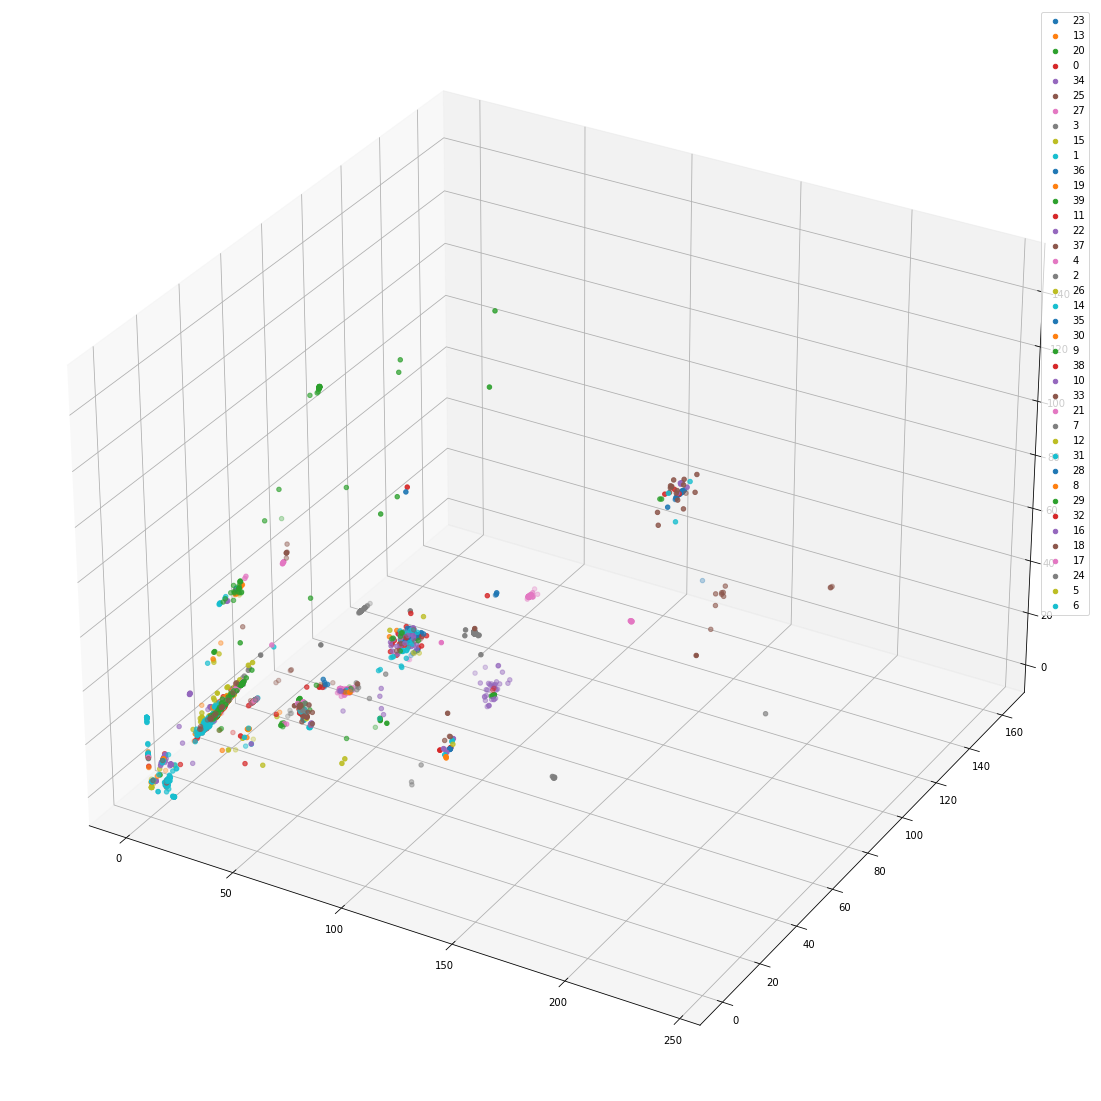

2:33: E251 unexpected spaces around keyword / parameter equals
2:35: E251 unexpected spaces around keyword / parameter equals
2:52: E251 unexpected spaces around keyword / parameter equals
2:54: E251 unexpected spaces around keyword / parameter equals
5:42: E251 unexpected spaces around keyword / parameter equals
7:4: E231 missing whitespace after ','
7:9: E225 missing whitespace around operator
7:62: E251 unexpected spaces around keyword / parameter equals
7:64: E251 unexpected spaces around keyword / parameter equals
8:33: W291 trailing whitespace
12:21: E251 unexpected spaces around keyword / parameter equals
12:23: E251 unexpected spaces around keyword / parameter equals
13:15: E124 closing bracket does not match visual indentation
15:45: E251 unexpected spaces around keyword / parameter equals
15:47: E251 unexpected spaces around keyword / parameter equals


In [16]:
from sklearn import cluster, metrics
clus = cluster.KMeans(n_clusters = 40, random_state = 38)
clus.fit(x_scale)

temp = pd.DataFrame(clus.labels_, columns =['label'])
temp = temp.join(pd.DataFrame(x_proj3d))
fig,ax =plt.subplots(subplot_kw={"projection": "3d"}, figsize = (20, 20))
for i in temp['label'].unique():   
    ax.scatter(temp[0].loc[temp['label'] == i],
               temp[1].loc[temp['label'] == i],
               temp[2].loc[temp['label'] == i],
               label = i
              )
plt.legend()
plt.savefig('cluster_3d_ae.png', bbox_inches = 'tight')
plt.show()

In [12]:
temp = pd.DataFrame(clus.labels_, columns =['label'])
temp = temp.join(pd.DataFrame(x_proj3d))

1:33: E231 missing whitespace after ','
1:41: E251 unexpected spaces around keyword / parameter equals


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 152)]             0         
                                                                 
 dense_8 (Dense)             (None, 50)                7650      
                                                                 
 dense_9 (Dense)             (None, 10)                510       
                                                                 
 dense_10 (Dense)            (None, 50)                550       
                                                                 
 dense_11 (Dense)            (None, 152)               7752      
                                                                 
Total params: 16,462
Trainable params: 16,462
Non-trainable params: 0
_________________________________________________________________
88/88 [==============================] - 0s 805us/s

E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.55, 0.4, 'Best silhouette : 0.57, Optimal Clus : 37')

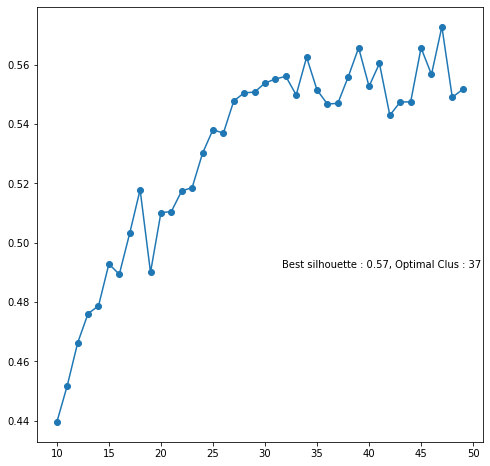

4:40: E231 missing whitespace after ','
4:51: E251 unexpected spaces around keyword / parameter equals
4:53: E251 unexpected spaces around keyword / parameter equals
5:35: E251 unexpected spaces around keyword / parameter equals
5:37: E251 unexpected spaces around keyword / parameter equals
6:52: E251 unexpected spaces around keyword / parameter equals
6:54: E251 unexpected spaces around keyword / parameter equals
7:44: E251 unexpected spaces around keyword / parameter equals
7:46: E251 unexpected spaces around keyword / parameter equals
9:34: E251 unexpected spaces around keyword / parameter equals
9:36: E251 unexpected spaces around keyword / parameter equals
9:52: E251 unexpected spaces around keyword / parameter equals
9:54: E251 unexpected spaces around keyword / parameter equals
9:68: E251 unexpected spaces around keyword / parameter equals
9:70: E251 unexpected spaces around keyword / parameter equals
9:80: E501 line too long (84 > 79 characters)
12:31: E251 unexpected spaces ar

In [13]:
n_inputs = x_scale.shape[1]

inputs = keras.Input(shape=(n_inputs,))
hidden1e = layers.Dense(int(n_inputs/3),activation = 'relu')(inputs)
code = layers.Dense(10, activation = 'relu')(hidden1e)
hidden1d = layers.Dense(int(n_inputs/3), activation = 'relu')(code)
outputs = layers.Dense(n_inputs, activation = 'relu')(hidden1d)

autoencoder2 = keras.Model(inputs = inputs, outputs = outputs, name = "autoencoder")

autoencoder2.summary()
autoencoder2.compile(optimizer = 'adam', loss='mse')
history = autoencoder2.fit(x_scale, x_scale, epochs = 100, verbose = 0)

encoder2 = keras.Model(inputs = inputs, outputs = code)

x_trans2 = encoder2.predict(x_scale)

from sklearn.manifold import TSNE
tsne = TSNE()
x_proj = tsne.fit_transform(x_trans2)

silhouette = []
for i in range(10,50):
    clus = cluster.KMeans(n_clusters = i)
    clus.fit(x_proj)
    sil  = metrics.silhouette_score(x_proj, clus.labels_)
    silhouette.append(sil)
max_sil = max(silhouette)
index = silhouette.index(max_sil)    
fig,ax = plt.subplots(figsize = (8,8))
ax.plot(range(10,50), silhouette, marker ='o')
ax.text(0.55,0.4,'Best silhouette : {:.2f}, Optimal Clus : {}'.format(max_sil, index), transform = ax.transAxes)    


E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


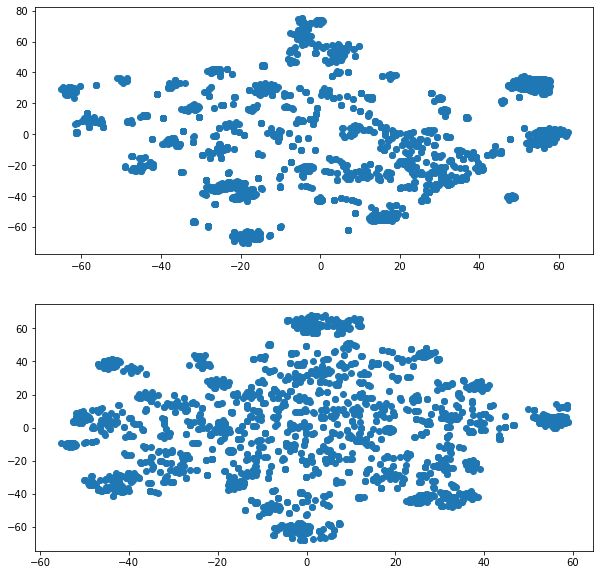

2:34: E251 unexpected spaces around keyword / parameter equals
2:36: E251 unexpected spaces around keyword / parameter equals
2:40: E231 missing whitespace after ','
3:23: E231 missing whitespace after ','
3:36: E231 missing whitespace after ','
4:24: E231 missing whitespace after ','
4:38: E231 missing whitespace after ','


In [14]:
x_proj2 = tsne.fit_transform(x_scale)
fig, ax = plt.subplots(2, figsize = (10,10))
ax[0].scatter(x_proj[:,0], x_proj[:,1])
ax[1].scatter(x_proj2[:,0], x_proj2[:,1])


Text(0.55, 0.4, 'Best silhouette : 0.49, Optimal Clus : 24')

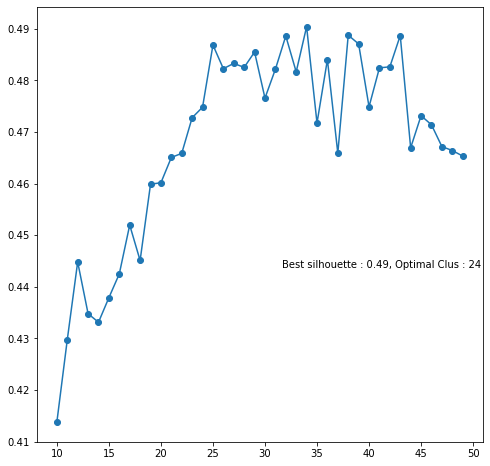

2:18: E231 missing whitespace after ','
3:37: E251 unexpected spaces around keyword / parameter equals
3:39: E251 unexpected spaces around keyword / parameter equals
5:8: E221 multiple spaces before operator
9:4: E231 missing whitespace after ','
9:30: E251 unexpected spaces around keyword / parameter equals
9:32: E251 unexpected spaces around keyword / parameter equals
9:35: E231 missing whitespace after ','
10:17: E231 missing whitespace after ','
10:41: E251 unexpected spaces around keyword / parameter equals
11:13: E231 missing whitespace after ','
11:17: E231 missing whitespace after ','
11:80: E501 line too long (112 > 79 characters)
11:97: E251 unexpected spaces around keyword / parameter equals
11:99: E251 unexpected spaces around keyword / parameter equals


In [15]:
silhouette = []
for i in range(10,50):
    clus = cluster.KMeans(n_clusters = i)
    clus.fit(x_proj2)
    sil  = metrics.silhouette_score(x_proj2, clus.labels_)
    silhouette.append(sil)
max_sil = max(silhouette)
index = silhouette.index(max_sil)
fig,ax = plt.subplots(figsize = (8,8))
ax.plot(range(10,50), silhouette, marker ='o')
ax.text(0.55,0.4,'Best silhouette : {:.2f}, Optimal Clus : {}'.format(max_sil, index), transform = ax.transAxes)